# Import all modules

In [5]:
import numpy as np
import pandas as pd
import h5py
import json

In [ ]:
# chunk2_data = pd.read_csv(r"E:\Major Project\Data\chunk2\chunk2.csv")
# chunk3_data = pd.read_csv(r"E:\Major Project\Data\chunk3\chunk3.csv")
# chunk4_data = pd.read_csv(r"E:\Major Project\Data\chunk4\chunk4.csv")
# chunk5_data = pd.read_csv(r"E:\Major Project\Data\chunk5\chunk5.csv")
# chunk6_data = pd.read_csv(r"E:\Major Project\Data\chunk6\chunk6.csv")
# for i in chunk4_data.columns:
#     print(i)

# Finalizing the most useful prameters

In [18]:
# Select the recommended columns for magnitude prediction
recommended_columns = [
    'source_magnitude',                # Target Variable
    'source_depth_km',                 # Depth of the earthquake source
    'source_latitude',                 # Latitude of the source
    'source_longitude',                # Longitude of the source
    'source_distance_km',              # Distance between source and receiver
    'p_arrival_sample',                # P-wave arrival sample
    's_arrival_sample',                # S-wave arrival sample
    'snr_db',                          # Signal-to-noise ratio
    'source_horizontal_uncertainty_km',# Horizontal uncertainty of the source
    'source_depth_uncertainty_km',     # Depth uncertainty of the source
    'p_travel_sec',                    # P-wave travel time
    'receiver_latitude',               # Latitude of the seismic station
    'receiver_longitude',
    'trace_name'              # Longitude of the seismic station
]

# Display the selected columns
# print(chunk2_data.head()[recommended_columns])


Data Processing Complete


### Categorize the csvs into multiple ranges of magnitude and save them

In [9]:
# Initialize dictionary for categorized data
categorized_data = {'2-3': [], '3-4': [], '4-5': [], '5-6': [], '6+': []}
magnitudes = chunk6_data['source_magnitude']  # Access the magnitudes
# Iterate through the magnitudes and categorize based on value
for i in range(len(magnitudes)):
    magnitude = magnitudes.iloc[i]  # Access the magnitude value
    trace_name = chunk6_data.iloc[i]['trace_name']  # Access the trace name
    
    # Categorize based on magnitude range
    if 2 <= magnitude < 3:
        categorized_data['2-3'].append(trace_name)
    elif 3 <= magnitude < 4:
        categorized_data['3-4'].append(trace_name)
    elif 4 <= magnitude < 5:
        categorized_data['4-5'].append(trace_name)
    elif 5 <= magnitude < 6:
        categorized_data['5-6'].append(trace_name)
    elif magnitude >= 6:
        categorized_data['6+'].append(trace_name)

# save the categorized data to a file
import json
with open('chunk_6_categorized_csvs.json', 'w') as file:
    json.dump(categorized_data, file)
print("Data Processing Complete")


Data Processing Complete


Chunk: 2
2-3 25493
3-4 8189
4-5 2689
5-6 227
6+ 16
Total =  36614
Chunk: 3
2-3 28612
3-4 9073
4-5 2606
5-6 251
6+ 20
Total =  40562
Chunk: 4
2-3 28012
3-4 14189
4-5 4345
5-6 385
6+ 33
Total =  46964
Chunk: 5
2-3 40795
3-4 23748
4-5 5240
5-6 430
6+ 36
Total =  70249
Chunk: 6
2-3 44321
3-4 24957
4-5 7031
5-6 596
6+ 41
Total =  76946
Total 2-3 =  167233
Total 3-4 =  80156
Total 4-5 =  21911
Total 5-6 =  1889
Total 6-7 =  146


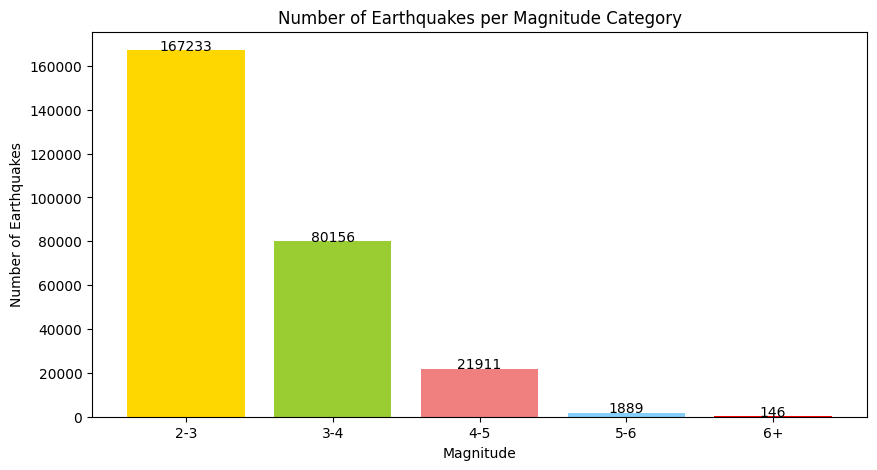

In [13]:
# read the categorized data from the file
l = [0]*5
for i in range(2,7):
    print('Chunk:',i)
    with open(f"E:/Major Project/Data/chunk{i}/chunk_{i}_categorized_csvs.json", 'r') as file:
        categorized_data = json.load(file)
    print('2-3', len(categorized_data['2-3']))
    l[0] += len(categorized_data['2-3'])
    print('3-4', len(categorized_data['3-4']))
    l[1] += len(categorized_data['3-4'])
    print('4-5', len(categorized_data['4-5']))
    l[2] += len(categorized_data['4-5'])
    print('5-6', len(categorized_data['5-6']))
    l[3] += len(categorized_data['5-6'])
    print('6+', len(categorized_data['6+']))
    l[4] += len(categorized_data['6+'])

    print('Total = ', len(categorized_data['2-3']) + len(categorized_data['3-4']) + len(categorized_data['4-5']) + len(categorized_data['5-6']) + len(categorized_data['6+']))
for i in range(len(l)):
    print(f'Total {i+2}-{i+3} = ', l[i])
# plot the categorized data
import matplotlib.pyplot as plt
import numpy as np

# Data to plot
labels = ['2-3', '3-4', '4-5', '5-6', '6+']
sizes = l
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

# bar Plot

fig = plt.figure(figsize =(10, 5))
plt.bar(labels, sizes, color=colors)
# display the number of earthquakes per category
for i in range(len(sizes)):
    plt.text(i, sizes[i], sizes[i], ha = 'center')
plt.xlabel('Magnitude')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes per Magnitude Category')
plt.show()

## Filtering out Indian Earthquake Data

In [14]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv(r"E:\Major Project\Data\chunk3\chunk3.csv")

# Define latitude and longitude boundaries for India and neighboring countries
lat_min, lat_max = 6, 37  # India's latitude range
lon_min, lon_max = 68, 97  # India's longitude range

# Adjust the ranges to cover neighboring countries (Pakistan, Nepal, Bhutan, Tibet)
# You can adjust the boundaries a bit more if needed to make the area larger
lat_min_neigh, lat_max_neigh = 23, 37  # For neighboring countries
lon_min_neigh, lon_max_neigh = 60, 97

# Filter rows based on latitude and longitude
def is_within_bounds(lat, lon):
    return ((lat_min <= lat <= lat_max and lon_min <= lon <= lon_max) or
            (lat_min_neigh <= lat <= lat_max_neigh and lon_min_neigh <= lon <= lon_max_neigh))

# Apply filter to DataFrame
df_filtered = df[df.apply(lambda row: is_within_bounds(row['source_latitude'], row['source_longitude']), axis=1)]

# Extract filenames of the rows that are within the defined boundaries
filenames_in_region = df_filtered['trace_name'].tolist()

# Print the filenames or do something with the list
print(filenames_in_region)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16980\4159793946.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"E:\Major Project\Data\chunk3\chunk3.csv")


['CHGR.TJ_20141028005500_EV', 'CHGR.TJ_20151030233426_EV', 'CHGR.TJ_20180422151946_EV']


## Extract and Combine the categorized data and save it

In [ ]:
import h5py
import json
import numpy as np

# File paths (update these with actual file paths)
base_dir = "E:/Major Project/Data"
hdf5_files = [f"{base_dir}/chunk{i}/chunk{i}.hdf5" for i in range(2,7)]
json_files = [f"{base_dir}/chunk{i}/chunk_{i}_categorized_csvs.json" for i in range(2,7)]

# Initialize dictionaries to store combined data
combined_data = {category: [] for category in ["2-3", "3-4", "4-5", "5-6", "6+"]}

# Function to load data from HDF5 based on JSON categories
def load_waveforms_from_hdf5(hdf5_path, json_path):
    print(hdf5_path)
    print(json_path)
    with h5py.File(hdf5_path, 'r') as hdf5_file:
        with open(json_path, 'r') as json_file:
            categorized_waveforms = json.load(json_file)
            # Extract data for each category
            for category, waveforms in categorized_waveforms.items():
                for waveform_name in waveforms:
                    if waveform_name in hdf5_file['data']:
                        combined_data[category].append(hdf5_file['data'][waveform_name][:])

# Process each pair of HDF5 and JSON files
for hdf5_file, json_file in zip(hdf5_files, json_files):
    load_waveforms_from_hdf5(hdf5_file, json_file)

# Check the combined data size
for category, waveforms in combined_data.items():
    print(f"Category {category}: {len(waveforms)} waveforms")

# Save the combined data to disk for future use
# np.save("combined_data_2-3.npy", np.array(combined_data["2-3"]))
np.save("combined_data_3-4.npy", np.array(combined_data["3-4"]))
np.save("combined_data_4-5.npy", np.array(combined_data["4-5"]))
np.save("combined_data_5-6.npy", np.array(combined_data["5-6"]))
np.save("combined_data_6+.npy", np.array(combined_data["6+"]))


E:/Major Project/Data/chunk2/chunk2.hdf5
E:/Major Project/Data/chunk2/chunk_2_categorized_csvs.json
E:/Major Project/Data/chunk3/chunk3.hdf5
E:/Major Project/Data/chunk3/chunk_3_categorized_csvs.json
E:/Major Project/Data/chunk4/chunk4.hdf5
E:/Major Project/Data/chunk4/chunk_4_categorized_csvs.json
E:/Major Project/Data/chunk5/chunk5.hdf5
E:/Major Project/Data/chunk5/chunk_5_categorized_csvs.json
E:/Major Project/Data/chunk6/chunk6.hdf5
E:/Major Project/Data/chunk6/chunk_6_categorized_csvs.json
Category 2-3: 167233 waveforms


## Load and verify the combined-categorized data

In [1]:
import numpy as np

# Load and verify each category
base_dir_cmombined_data = "E:/Major Project/Data/Combined/"
data_2_3 = np.load(base_dir_cmombined_data+"combined_data_2-3.npy")
data_3_4 = np.load(base_dir_cmombined_data+"combined_data_3-4.npy")
data_4_5 = np.load(base_dir_cmombined_data+"combined_data_4-5.npy")
data_5_6 = np.load(base_dir_cmombined_data+"combined_data_5-6.npy")
data_6_plus = np.load(base_dir_cmombined_data+"combined_data_6+.npy")

# Check shapes
print(f"2-3: {data_2_3.shape}, 3-4: {data_3_4.shape}, 4-5: {data_4_5.shape}, 5-6: {data_5_6.shape}, 6+: {data_6_plus.shape}")

2-3: (167233, 6000, 3), 3-4: (80156, 6000, 3), 4-5: (21911, 6000, 3), 5-6: (1889, 6000, 3), 6+: (146, 6000, 3)


## Balance the data for each category

#### Downsample over-represented classes

In [ ]:
import numpy as np
import random
combined_data_dir = "E:\Major Project\Data\Combined"
balanced_data_dir = "E:\Major Project\Data\Balanced"
# Load waveforms
data_2_3 = np.load(rf"{combined_data_dir}\combined_data_2-3.npy")
data_3_4 = np.load(rf"{combined_data_dir}\combined_data_3-4.npy")

# Downsample to 30,000 waveforms each
selected_2_3 = np.array(random.sample(list(data_2_3), 30000))
selected_3_4 = np.array(random.sample(list(data_3_4), 30000))

# Save the downsampled data
np.save("balanced_2-3.npy", selected_2_3)
np.save("balanced_3-4.npy", selected_3_4)


#### Oversample Underrepresented Classes

In [ ]:
def add_noise(waveform, noise_level=0.01):
    noise = np.random.normal(0, noise_level, waveform.shape)
    return waveform + noise

# Load minority class waveforms
data_5_6 = np.load(rf"{combined_data_dir}\combined_data_5-6.npy")
data_6_plus = np.load(rf"{combined_data_dir}\combined_data_6+.npy")

# Augment `5-6` to 2,500 samples and `6+` to 500 samples
augmented_5_6 = np.array([add_noise(wave) for wave in data_5_6] * 2)[:2500]
augmented_6_plus = np.array([add_noise(wave) for wave in data_6_plus] * 3)[:500]

# Save augmented data
np.save(rf"{blanced_data_dir}\balanced_5-6.npy", augmented_5_6)
np.save(rf"{balanced_data_dir}\balanced_6+.npy", augmented_6_plus)


#### Validate the data balancing

In [ ]:
# balanced_data_2_3 = np.load(rf"{balanced_data_dir}\balanced_2-3.npy")
# balanced_data_3_4 = np.load(rf"{balanced_data_dir}\balanced_3-4.npy")
# balanced_data_5_6 = np.load(rf"{balanced_data_dir}\balanced_5-6.npy")
# balanced_data_4_5 = np.load(rf"{balanced_data_dir}\balanced_4-5.npy")
# balanced_data_6_plus = np.load(rf"{balanced_data_dir}\balanced_6+.npy")

# Check shapes
print(f" 2-3: {balanced_data_2_3.shape}\n 3-4: {balanced_data_3_4.shape}\n 4-5: {balanced_data_4_5.shape}\n 5-6: {balanced_data_5_6.shape}\n 6+: {balanced_data_6_plus.shape}")

 2-3: (30000, 6000, 3)
 3-4: (30000, 6000, 3)
 4-5: (21911, 6000, 3)
 5-6: (2500, 6000, 3)
 6+: (438, 6000, 3)


#### Assign Weighted Loss (More weight => More importance given by model)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Define magnitude labels
y = np.concatenate([
    np.full(len(selected_2_3), 2),
    np.full(len(selected_3_4), 3),
    np.full(len(data_4_5), 4),
    np.full(len(augmented_5_6), 5),
    np.full(len(augmented_6_plus), 6)
])

# Compute class weights
weights = compute_class_weight("balanced", classes=np.unique(y), y=y)
class_weights = dict(enumerate(weights))

print("Class Weights:", class_weights)


NameError: name 'selected_2_3' is not defined